In [38]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import pandas as pd
from matplotlib.pyplot import figure
#import plotly.graph_objects as go
import numpy as np
import math

In [46]:
df = pd.read_csv("Data/BRAZIl_SOY_2.6.0_tc/BRAZIL_SOY_2.6.0_tc.csv", sep=",")
df = df[['YEAR','EXPORTER GROUP', 'COUNTRY OF FIRST IMPORT', 'TOTAL']]
df = df.groupby(['EXPORTER GROUP', 'COUNTRY OF FIRST IMPORT', 'YEAR']).sum('TOTAL')
df.reset_index(inplace = True)

In [74]:
first = set(df[df["YEAR"] == 2018]["EXPORTER GROUP"].unique())
print(len(first))
second = set(df[df["YEAR"] == 2019]["EXPORTER GROUP"].unique())
print(len(second))
print(len(first - second))

302
378
127


In [78]:
first = df[df["YEAR"] == 2010]["TOTAL"].sum()
print(first)
second = df[df["YEAR"] == 2011]["TOTAL"].sum()
print(second)
print(first - second)

68756342.93104684
74815446.92202702
-6059103.990980178


In [90]:
first = df[df["YEAR"] == 2018].sort_values("TOTAL", ascending=False)
print(first)
second = df[df["YEAR"] == 2019].sort_values("TOTAL", ascending=False)
print(second)
#print(first - second)

                       EXPORTER GROUP COUNTRY OF FIRST IMPORT  YEAR  \
11219            DOMESTIC CONSUMPTION                  BRAZIL  2018   
4679                            BUNGE        CHINA (MAINLAND)  2018   
5923                          CARGILL        CHINA (MAINLAND)  2018   
408                               ADM        CHINA (MAINLAND)  2018   
15576                   LOUIS DREYFUS        CHINA (MAINLAND)  2018   
...                               ...                     ...   ...   
8544                            COFCO                  PANAMA  2018   
16208  MARCA CAFE COMERCIO EXPORTACAO             ISLE OF MAN  2018   
350                               ADM     ANTIGUA AND BARBUDA  2018   
16345                        MARUBENI                   JAPAN  2018   
989                        AFG BRASIL                  TAIWAN  2018   

              TOTAL  
11219  1.836954e+07  
4679   8.954385e+06  
5923   8.650949e+06  
408    8.543598e+06  
15576  7.239487e+06  
...            

In [47]:
grafos = {}

keys = list(range(2004,2021))

for i in range(0,17):
    frame = df[df["YEAR"] == keys[i]]
    
    alan = []
    for row in frame.index:
        alan.append((frame["EXPORTER GROUP"][row], frame["COUNTRY OF FIRST IMPORT"][row], {'weight': frame["TOTAL"][row]})) 

    B = nx.Graph()
    B.add_nodes_from(df['EXPORTER GROUP'].unique().tolist(), bipartite=0)
    B.add_nodes_from(df['COUNTRY OF FIRST IMPORT'].unique().tolist(), bipartite=1)
    B.add_edges_from(alan)
    grafos[keys[i]] = B


In [53]:
keys = list(range(2004,2021))

hhi = []

for i in range(0,17):
    frame = df[df["YEAR"] == keys[i]]
    total_per_company = {}
    
    for row in frame.index:
        exporter = frame["EXPORTER GROUP"][row]
        if exporter not in total_per_company:
            total_per_company[exporter] = 0
        total_per_company[exporter] += frame["TOTAL"][row]
    
    total = sum(total_per_company.values())
    market_shares = list(map(lambda amount: amount / total, total_per_company.values()))
    squared = list(map(lambda share: math.pow(share, 2), market_shares))
    hhi.append(sum(squared))
print(hhi)

[0.12084544725442076, 0.11056746874685226, 0.11853200035754591, 0.15338002801273842, 0.16572045836332416, 0.12957592735329068, 0.1666816457227556, 0.16076997971069137, 0.11379587791104721, 0.1242011254793406, 0.1268357429919076, 0.1116666328738487, 0.12654857013734352, 0.11157258130048014, 0.08035380355402791, 0.10598761048516361, 0.08358610285236617]


In [48]:
grafos[2010].edges()

EdgeView([('AB COMERCIO DE INSUMOS', 'CHINA (MAINLAND)'), ('AB COMERCIO DE INSUMOS', 'IRAN'), ('AB COMERCIO DE INSUMOS', 'ITALY'), ('AB COMERCIO DE INSUMOS', 'NETHERLANDS'), ('AB COMERCIO DE INSUMOS', 'RUSSIAN FEDERATION'), ('AB COMERCIO DE INSUMOS', 'SOUTH KOREA'), ('AB COMERCIO DE INSUMOS', 'UZBEKISTAN'), ('ACOTECNICA INDUSTRIA E COMERCIO', 'FRANCE'), ('ACOTECNICA INDUSTRIA E COMERCIO', 'NETHERLANDS'), ('ADAMA BRASIL', 'CHINA (MAINLAND)'), ('ADAMI SA MADEIRAS', 'CHINA (MAINLAND)'), ('ADAMI SA MADEIRAS', 'THAILAND'), ('ADM', 'BANGLADESH'), ('ADM', 'BELGIUM'), ('ADM', 'CHINA (HONG KONG)'), ('ADM', 'CHINA (MAINLAND)'), ('ADM', 'COLOMBIA'), ('ADM', 'DOMINICAN REPUBLIC'), ('ADM', 'EGYPT'), ('ADM', 'FRANCE'), ('ADM', 'GERMANY'), ('ADM', 'INDONESIA'), ('ADM', 'IRAN'), ('ADM', 'ISRAEL'), ('ADM', 'ITALY'), ('ADM', 'JAPAN'), ('ADM', 'NETHERLANDS'), ('ADM', 'POLAND'), ('ADM', 'PORTUGAL'), ('ADM', 'ROMANIA'), ('ADM', 'SAUDI ARABIA'), ('ADM', 'SLOVENIA'), ('ADM', 'SOUTH KOREA'), ('ADM', 'SPAIN'),

In [30]:
grafos

{2004: <networkx.classes.graph.Graph at 0x12f295130>,
 2005: <networkx.classes.graph.Graph at 0x12f2f9400>,
 2006: <networkx.classes.graph.Graph at 0x12f2954c0>,
 2007: <networkx.classes.graph.Graph at 0x13cf262e0>,
 2008: <networkx.classes.graph.Graph at 0x13cf1a160>,
 2009: <networkx.classes.graph.Graph at 0x12f28f5b0>,
 2010: <networkx.classes.graph.Graph at 0x13cf262b0>,
 2011: <networkx.classes.graph.Graph at 0x12f2f9e80>,
 2012: <networkx.classes.graph.Graph at 0x12f2f9b20>,
 2013: <networkx.classes.graph.Graph at 0x13d3c43d0>,
 2014: <networkx.classes.graph.Graph at 0x13d3c4460>,
 2015: <networkx.classes.graph.Graph at 0x13d3c43a0>,
 2016: <networkx.classes.graph.Graph at 0x13d3c4fd0>,
 2017: <networkx.classes.graph.Graph at 0x13d3c4490>,
 2018: <networkx.classes.graph.Graph at 0x13d3c4430>,
 2019: <networkx.classes.graph.Graph at 0x12f3027f0>,
 2020: <networkx.classes.graph.Graph at 0x12f3027c0>}

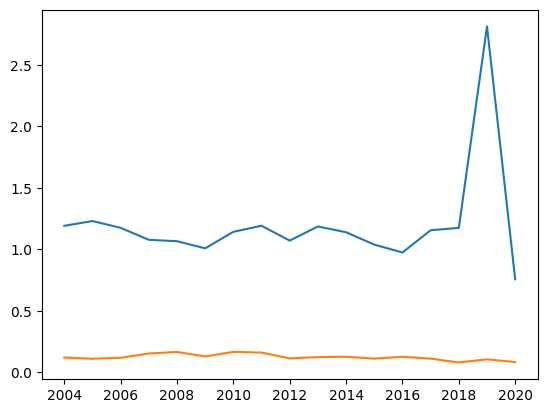

In [62]:
def refresh_graph(graph_a, additions):
    """Ensures that the nodes (and the adjacency lists) are in the right order"""
    out = nx.Graph()
    nodes = list(graph_a.nodes()) + list(additions)
    nodes = sorted(nodes)
    out.add_nodes_from(nodes)
    out.add_edges_from(graph_a.edges())
    return out

def compute_change(graph_a, graph_b):
    additions = graph_b.nodes() - graph_a.nodes() 
    deletions = graph_a.nodes() - graph_b.nodes() 
    graph_a = refresh_graph(graph_a, additions)
    graph_b = refresh_graph(graph_b, deletions)    
    prev = nx.adjacency_matrix(graph_a).A
    curr = nx.adjacency_matrix(graph_b).A
    change = sum(sum(abs(curr - prev)))
    maximum = sum(sum(prev))
    return change / maximum

def change_metric(graphs):
    """
    Takes in a list of transaction graphs and returns a list of the change between each
    """
    output = []
    for i in range(0, len(graphs)):
        output.append(compute_change(graphs[i-1], graphs[i]))
    return output


    
def hhi_metric(graphs):
    """
    Takes in a list of transaction graphs and returns a list of the change between each
    """
    output = [0]
    for i in range(0, len(graphs)):
        output.append(compute_hhi(graphs[i]))
    return output

our_metric = change_metric(list(map(lambda year: grafos[year], range(2004, 2021))))
plt.plot(range(2004, 2021), our_metric)
plt.plot(range(2004, 2021), hhi)

In [ ]:
B.nodes(data=True)

In [ ]:
nx.degree_centrality(B)

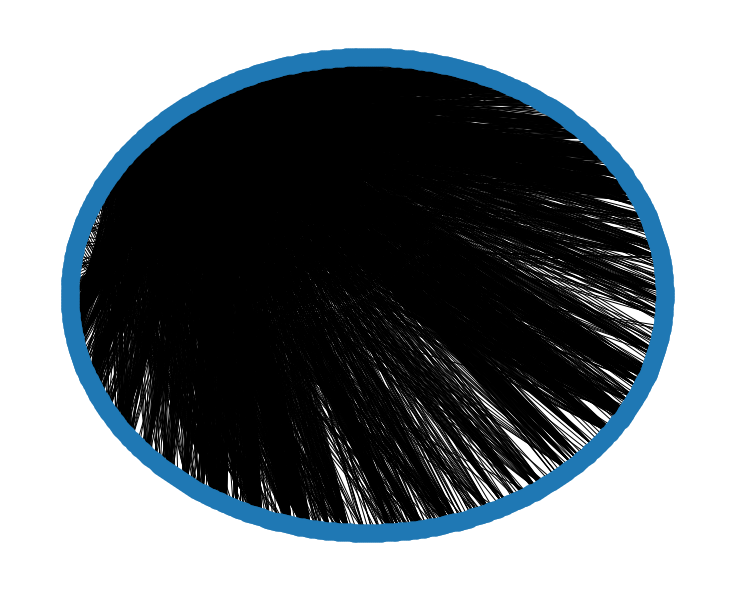

In [40]:
#G = nx.from_pandas_edgelist(df3, 'EXPORTER GROUP', 'COUNTRY OF FIRST IMPORT', ['TOTAL'])
figure(figsize=(10, 8))
nx.draw_shell(grafos[2020], with_labels=False)